In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as norm

df = pd.read_csv('../data/clean/datos_limpios.csv')
df = df[df['total']>0]

In [2]:
df.drop(columns='Unnamed: 0', inplace = True)

# Escala Logaritmica

In [3]:
df_log = df.copy()
df_log['total'] = np.log(df_log['total'])
#df_log = df_log[df_log['total'] >= 14]

#df_log.to_csv('../data/clean/datos_limpios_log.csv', index=False)

In [4]:
df_log = df_log[df_log['total'] > 12]

#print(df_log.shape[0])
#print(df_log[df_log['total']< 14].shape[0])

In [112]:
df_log['total'].describe()

count    2297.000000
mean       18.693719
std         2.070498
min        12.206073
25%        17.370859
50%        18.875582
75%        20.101862
max        26.048361
Name: total, dtype: float64

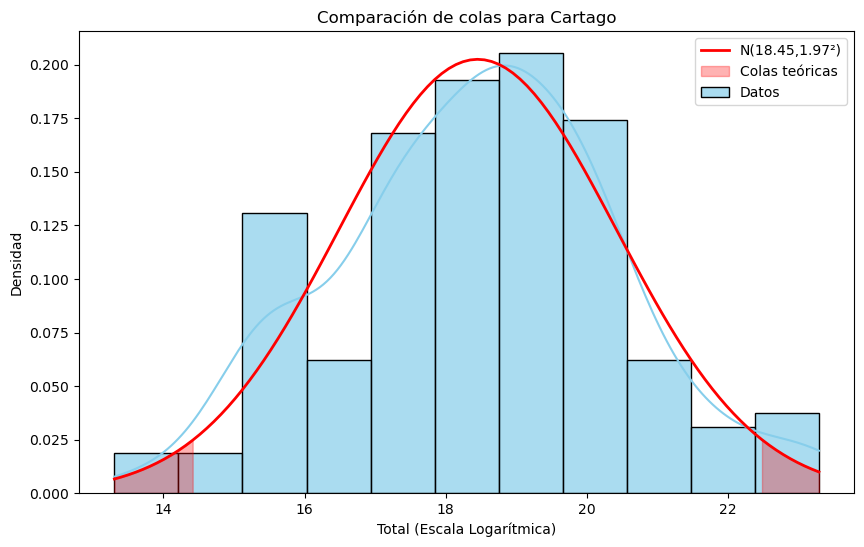

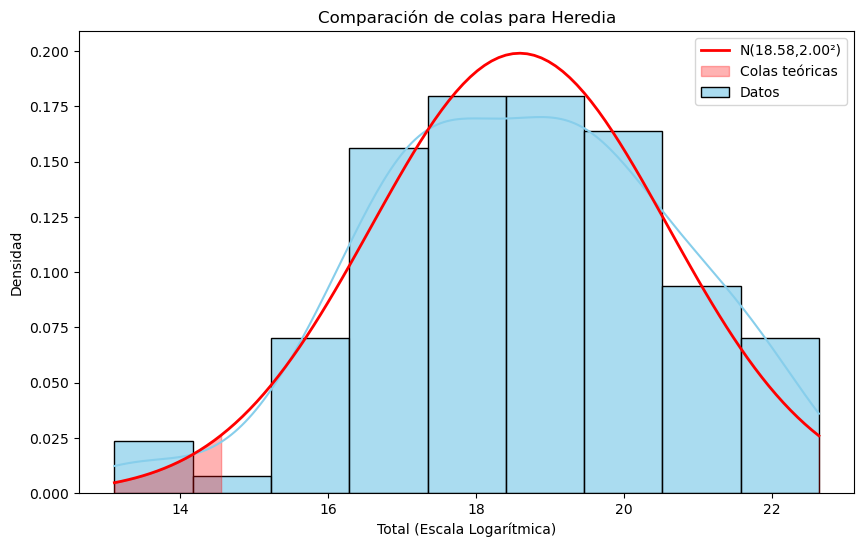

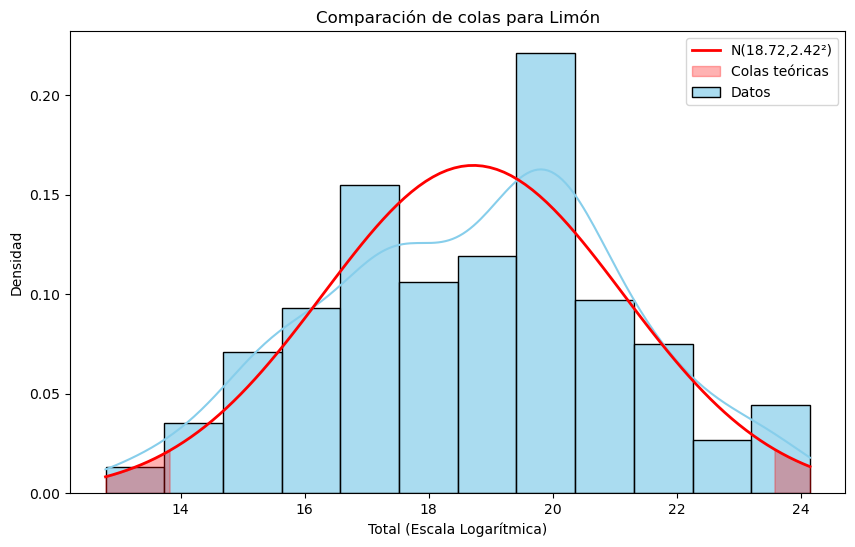

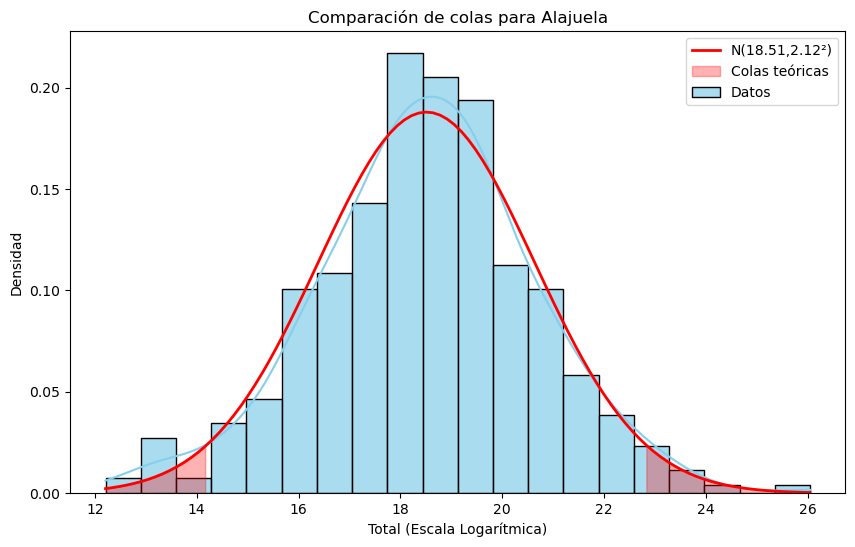

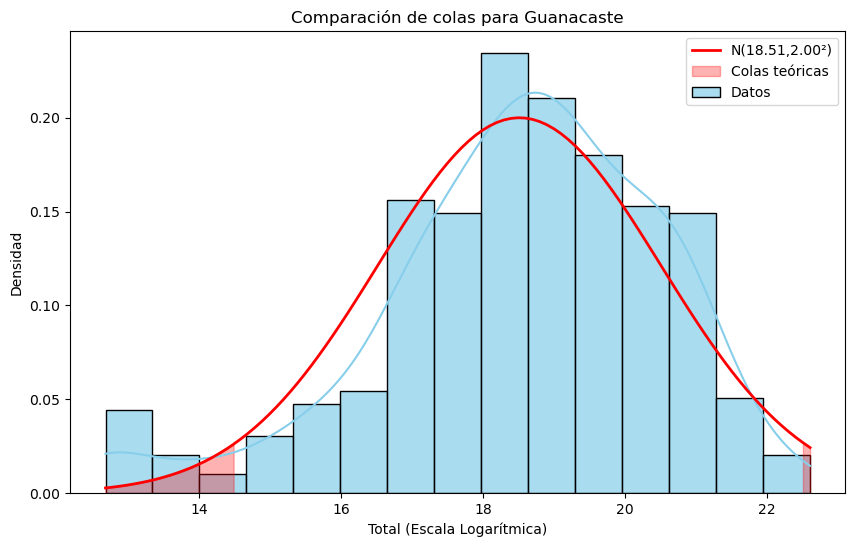

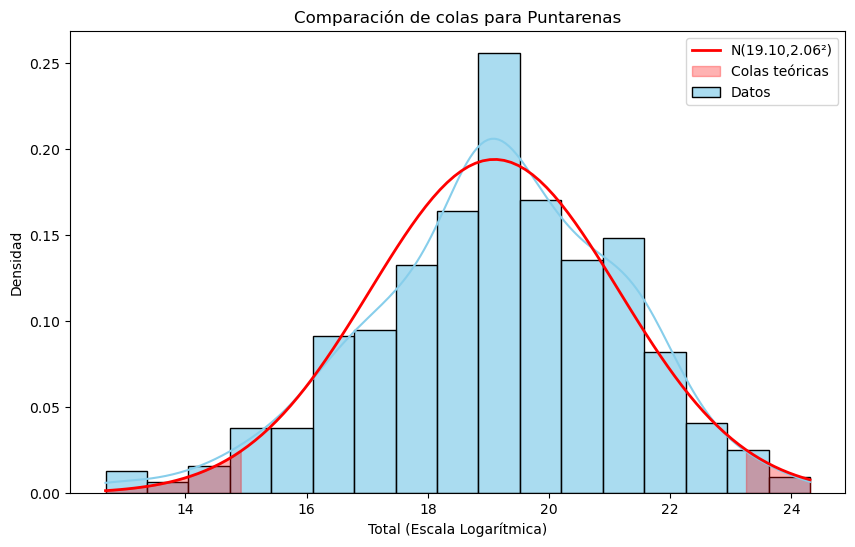

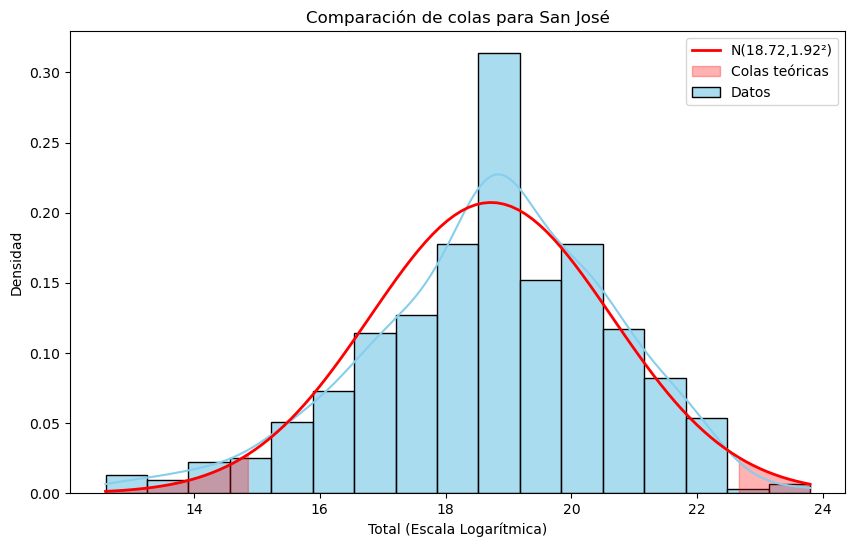

In [ ]:
for provincia in df_log['provincia'].unique():
    plt.figure(figsize=(10, 6))
    datos_provincia = df_log[df_log['provincia'] == provincia]['total']
    media = datos_provincia.mean()
    desv = datos_provincia.std()
    sns.histplot(datos_provincia, kde=True, stat='density', alpha=0.7, 
                 label='Datos', color='skyblue')
    x = np.linspace(datos_provincia.min(), datos_provincia.max(), 100)
    y_normal = norm.pdf(x, media, desv)
    plt.plot(x, y_normal, 'r-', linewidth=2, 
             label=f'N({media:.2f},{desv:.2f}²)')
    umbral_colas = media + 2*desv
    cola_derecha = x > umbral_colas
    cola_izquierda = x < (media - 2*desv)
    plt.fill_between(x[cola_derecha], 0, y_normal[cola_derecha], 
                     alpha=0.3, color='red', label='Colas teóricas')
    plt.fill_between(x[cola_izquierda], 0, y_normal[cola_izquierda], 
                     alpha=0.3, color='red')
    plt.title(f'Comparación de colas para {provincia}')
    plt.xlabel('Total (Escala Logarítmica)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()
    plt.close()

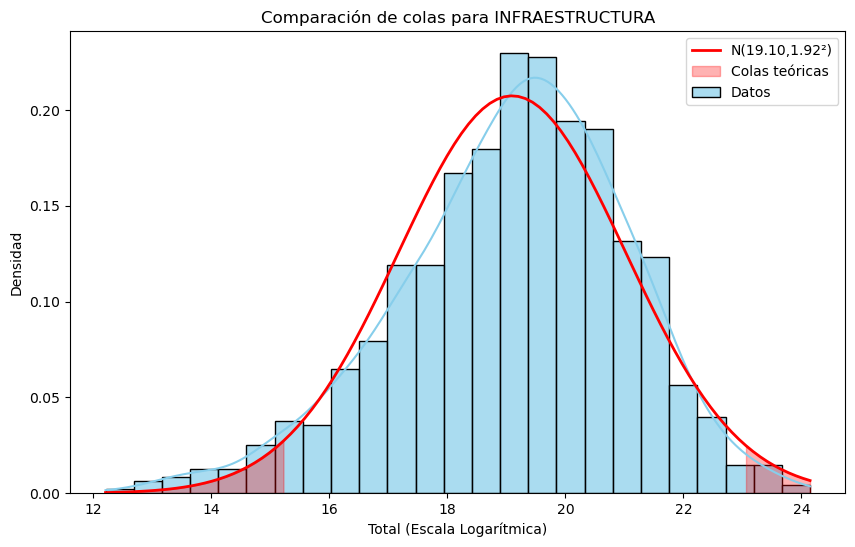

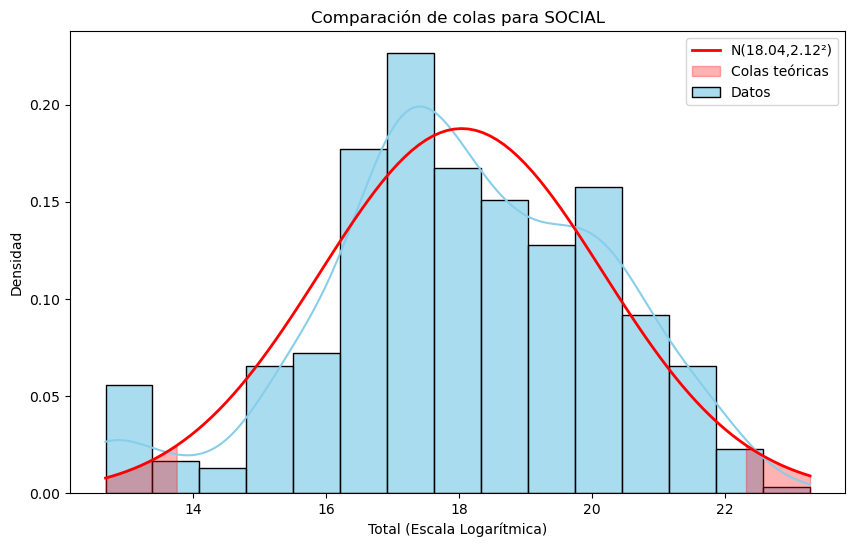

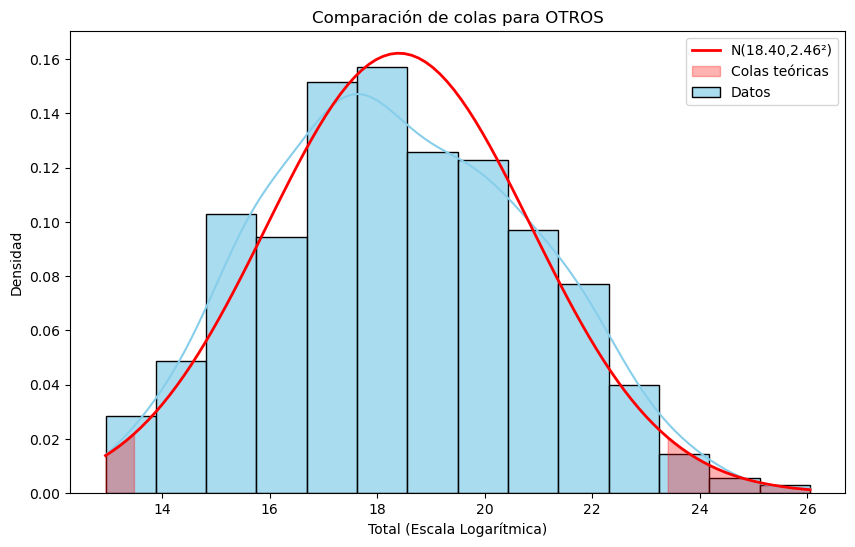

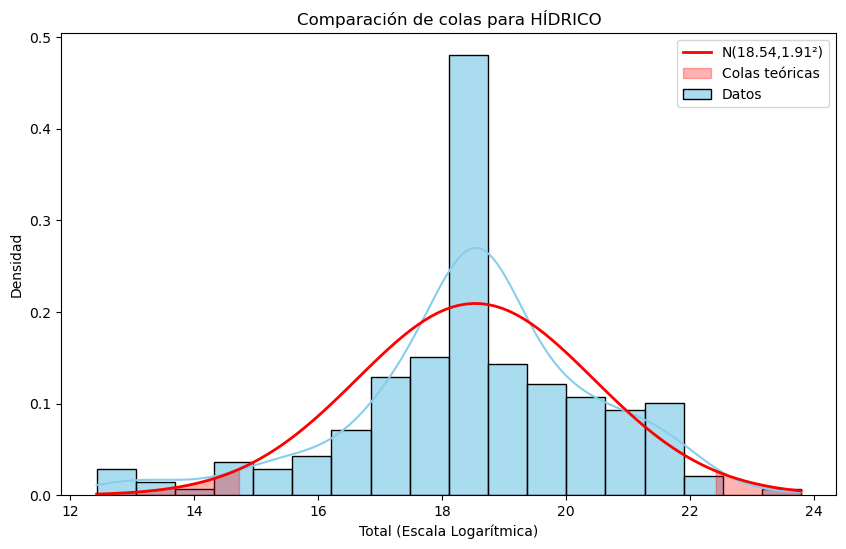

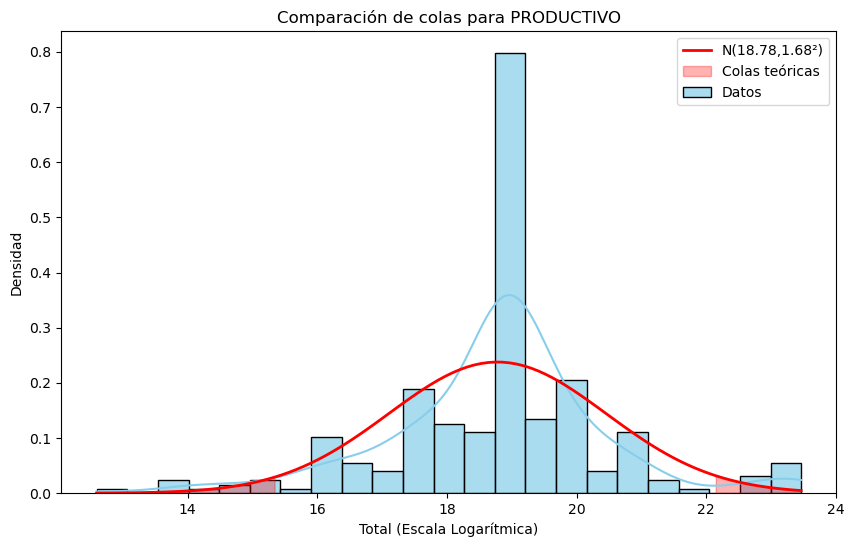

In [132]:
for sector in df_log['sector'].unique():
    plt.figure(figsize=(10, 6))
    datos_sector = df_log[df_log['sector'] == sector]['total']
    media = datos_sector.mean()
    desv = datos_sector.std()
    sns.histplot(datos_sector, kde=True, stat='density', alpha=0.7, 
                 label='Datos', color='skyblue')
    x = np.linspace(datos_sector.min(), datos_sector.max(), 100)
    y_normal = norm.pdf(x, media, desv)
    plt.plot(x, y_normal, 'r-', linewidth=2, 
             label=f'N({media:.2f},{desv:.2f}²)')
    umbral_colas = media + 2*desv
    cola_derecha = x > umbral_colas
    cola_izquierda = x < (media - 2*desv)
    plt.fill_between(x[cola_derecha], 0, y_normal[cola_derecha], 
                     alpha=0.3, color='red', label='Colas teóricas')
    plt.fill_between(x[cola_izquierda], 0, y_normal[cola_izquierda], 
                     alpha=0.3, color='red')
    plt.title(f'Comparación de colas para {sector}')
    plt.xlabel('Total (Escala Logarítmica)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()
    plt.close()

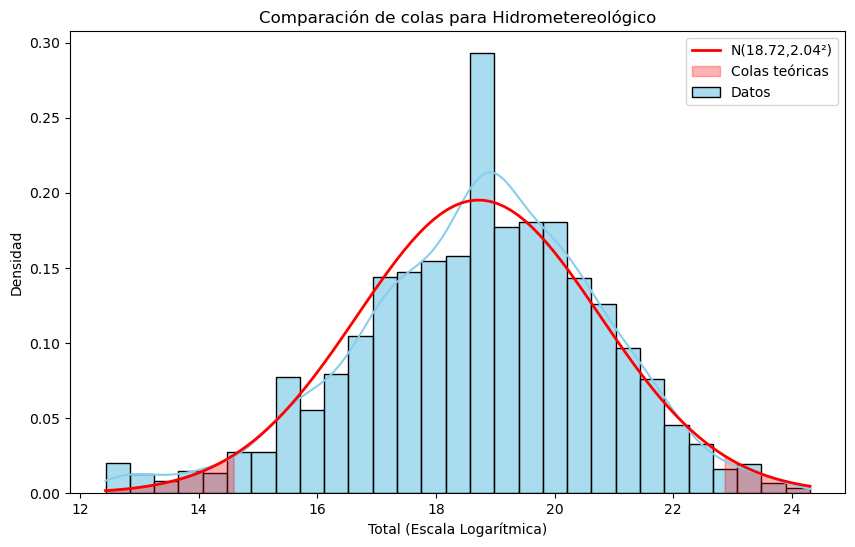

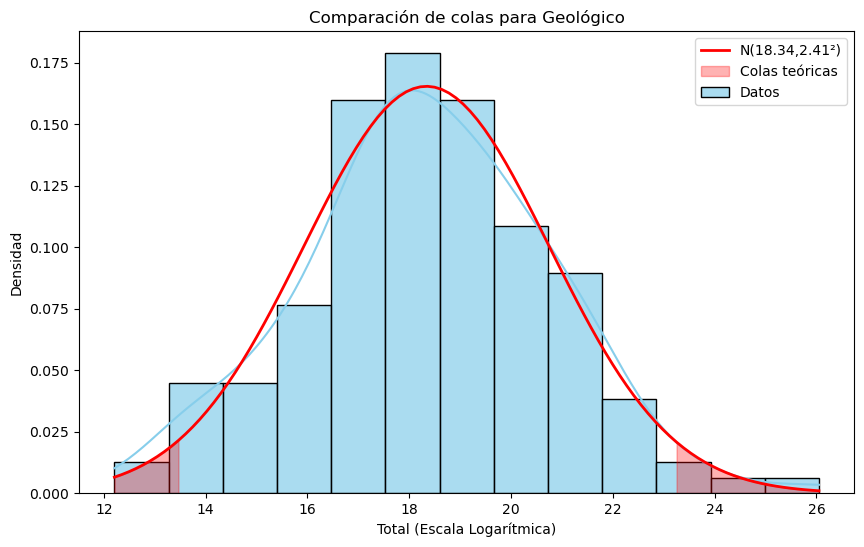

In [133]:
for categoria in df_log['categoria'].unique():
    plt.figure(figsize=(10, 6))
    datos_categoria = df_log[df_log['categoria'] == categoria]['total']
    media = datos_categoria.mean()
    desv = datos_categoria.std()
    sns.histplot(datos_categoria, kde=True, stat='density', alpha=0.7, 
                 label='Datos', color='skyblue')
    x = np.linspace(datos_categoria.min(), datos_categoria.max(), 100)
    y_normal = norm.pdf(x, media, desv)
    plt.plot(x, y_normal, 'r-', linewidth=2, 
             label=f'N({media:.2f},{desv:.2f}²)')
    umbral_colas = media + 2*desv
    cola_derecha = x > umbral_colas
    cola_izquierda = x < (media - 2*desv)
    plt.fill_between(x[cola_derecha], 0, y_normal[cola_derecha], 
                     alpha=0.3, color='red', label='Colas teóricas')
    plt.fill_between(x[cola_izquierda], 0, y_normal[cola_izquierda], 
                     alpha=0.3, color='red')
    plt.title(f'Comparación de colas para {categoria}')
    plt.xlabel('Total (Escala Logarítmica)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()
    plt.close()

In [7]:
df_log['canton'].value_counts()

canton
Pérez Zeledón    56
Puntarenas       55
Desamparados     54
Sarapiquí        53
Nicoya           51
                 ..
Cóbano            2
Curridabat        2
Santo Domingo     1
San Isidro        1
Coronado          1
Name: count, Length: 86, dtype: int64